# 파이토치의 구성요소
- torch: 텐서를 생성하는 라이브러리

- torch.autograd: 자동미분 기능을 제공하는 라이브러리

- torch.nn: 신경망을 생성하는 라이브러리

- torch.multiprocessing: 병럴처리 기능을 제공하는 라이브러리

- torch.utils: 데이터 조작 등 유틸리티 기능 제공

- torch.legacy(./nn/.optim): Torch로부터 포팅해온 코드

- torch.onnx: ONNX(Open Neural Network Exchange)
    - 서로 다른 프레임워크 간의 모델을 공유할 때 사용

In [65]:
import torch

In [66]:
torch.__version__

'1.10.2'

In [67]:
USE_CUDA = torch.cuda.is_available()
print(USE_CUDA)

device = torch.device('cuda:0' if USE_CUDA else 'cpu')
print('학습을 진행하는 기기:',device)

True
학습을 진행하는 기기: cuda:0


In [68]:
# 초기화 되지않은 행렬
x = torch.empty(4,2)
print(x)

tensor([[6.3058e-44, 6.7262e-44],
        [7.0065e-44, 6.3058e-44],
        [6.8664e-44, 7.7071e-44],
        [1.1771e-43, 6.7262e-44]])


In [69]:
# 무작위로 초기화된 행렬(tensor)
x = torch.rand(4,2)
print(x)

tensor([[0.3368, 0.8927],
        [0.2308, 0.6453],
        [0.3656, 0.6974],
        [0.6982, 0.6294]])


In [70]:
x = torch.zeros(4,2, dtype = torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


In [71]:
x = torch.tensor([2, 2.3])
print(x)

tensor([2.0000, 2.3000])


In [72]:
x = x.new_ones(2,4,dtype = torch.double)  # 1로 채워진 형태
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [73]:
x = torch.randn_like(x, dtype = float)  # 기존의 x를 가져와서 랜덤으로 채운다.
print(x)

tensor([[-0.9616, -1.3301, -0.9932, -1.0432],
        [-0.3950, -1.7977,  0.6867,  0.3547]], dtype=torch.float64)


In [74]:
print(x.size())

torch.Size([2, 4])


In [75]:
print(x)

tensor([[-0.9616, -1.3301, -0.9932, -1.0432],
        [-0.3950, -1.7977,  0.6867,  0.3547]], dtype=torch.float64)


In [76]:
y = torch.rand(2,4)
print(y)
print(x+y)

tensor([[0.6570, 0.0141, 0.1290, 0.3583],
        [0.7007, 0.2179, 0.7612, 0.4466]])
tensor([[-0.3046, -1.3160, -0.8641, -0.6848],
        [ 0.3057, -1.5798,  1.4479,  0.8013]], dtype=torch.float64)


In [77]:
print(torch.add(x, y))

tensor([[-0.3046, -1.3160, -0.8641, -0.6848],
        [ 0.3057, -1.5798,  1.4479,  0.8013]], dtype=torch.float64)


In [78]:
result = torch.empty(2,4)
torch.add(x,y,out = result)
print(result)

tensor([[-0.3046, -1.3160, -0.8641, -0.6848],
        [ 0.3057, -1.5798,  1.4479,  0.8013]])


In [79]:
print(x)
print(y)

# in-place 방식 
# y.add_  y +=x

y.add_(x)
print(y)

tensor([[-0.9616, -1.3301, -0.9932, -1.0432],
        [-0.3950, -1.7977,  0.6867,  0.3547]], dtype=torch.float64)
tensor([[0.6570, 0.0141, 0.1290, 0.3583],
        [0.7007, 0.2179, 0.7612, 0.4466]])
tensor([[-0.3046, -1.3160, -0.8641, -0.6848],
        [ 0.3057, -1.5798,  1.4479,  0.8013]])


In [80]:
x = torch.Tensor([[1,3],
                  [5,7]])
y = torch.Tensor([[2,4],
                  [6,8]])
print(x-y)
print(torch.sub(x,y))
print(x.sub(y))

tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])


In [81]:
x = torch.Tensor([[1,3],
                  [5,7]])
y = torch.Tensor([[2,4],
                  [6,8]])
print(x*y)
print(torch.mul(x,y))
print(x.mul(y))

tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])


In [82]:
x = torch.Tensor([[1,3],
                  [5,7]])
y = torch.Tensor([[2,4],
                  [6,8]])
print(x/y)
print(torch.div(x,y))
print(x.div(y))

tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])


In [83]:
x = torch.Tensor([[1,3],
                  [5,7]])
y = torch.Tensor([[2,4],
                  [6,8]])
print(torch.mm(x,y))   # 행렬 곱

tensor([[20., 28.],
        [52., 76.]])


In [84]:
print(x)

tensor([[1., 3.],
        [5., 7.]])


In [85]:
print(x[:,1])

tensor([3., 7.])


In [86]:
# view 텐서의 크기나 모양을 변경

x = torch.randn(4,5)
y = x.view(20)
z = x.view(5,-1)

print(x)
print(y)
print(z)


tensor([[ 0.5916,  1.1590, -0.7306,  1.0534, -0.3500],
        [-1.0133,  0.9117, -0.0636,  0.1719, -1.1887],
        [-0.4495, -0.1222, -0.0799,  1.8019,  0.9448],
        [ 0.2288,  1.2604,  0.3921,  1.3688, -0.3022]])
tensor([ 0.5916,  1.1590, -0.7306,  1.0534, -0.3500, -1.0133,  0.9117, -0.0636,
         0.1719, -1.1887, -0.4495, -0.1222, -0.0799,  1.8019,  0.9448,  0.2288,
         1.2604,  0.3921,  1.3688, -0.3022])
tensor([[ 0.5916,  1.1590, -0.7306,  1.0534],
        [-0.3500, -1.0133,  0.9117, -0.0636],
        [ 0.1719, -1.1887, -0.4495, -0.1222],
        [-0.0799,  1.8019,  0.9448,  0.2288],
        [ 1.2604,  0.3921,  1.3688, -0.3022]])


In [87]:
# item : 텐서에 값이 단 하나라도 존재하면, 숫자값을 얻을 수 있음
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([1.4632])
1.46316397190094
torch.float32


In [88]:
x = torch.randn(1)  # 1개여야만 함
print(x)
print(x.item())
print(x.dtype)

# ValueError: only one element tensors can be converted to Python scalars

tensor([0.0309])
0.0308811217546463
torch.float32


In [89]:
# squeeze : 차원을 축소(제거)
tensor = torch.rand(1, 3, 3)
print(tensor)
tensor.shape

tensor([[[0.5110, 0.2320, 0.6159],
         [0.6211, 0.9314, 0.3643],
         [0.2337, 0.3145, 0.7871]]])


torch.Size([1, 3, 3])

In [90]:
t = tensor.squeeze()
print(t)
print(t.shape)

tensor([[0.5110, 0.2320, 0.6159],
        [0.6211, 0.9314, 0.3643],
        [0.2337, 0.3145, 0.7871]])
torch.Size([3, 3])


In [91]:
tensor = torch.rand(1, 3, 3)
print(tensor)
tensor.shape


tensor([[[0.5983, 0.8784, 0.9013],
         [0.4495, 0.6848, 0.3877],
         [0.5266, 0.3246, 0.2335]]])


torch.Size([1, 3, 3])

In [92]:
# unsqueeze 차원을 증가(생성)

t = tensor.unsqueeze(dim=0)

print(t)
print(t.shape)

tensor([[[[0.5983, 0.8784, 0.9013],
          [0.4495, 0.6848, 0.3877],
          [0.5266, 0.3246, 0.2335]]]])
torch.Size([1, 1, 3, 3])


In [93]:
# stack : 텐서 간 결합
x= torch.FloatTensor([1,4])
y= torch.FloatTensor([2,5])
z= torch.FloatTensor([3,6])

print(torch.stack([x,y,z]))
print(torch.stack([x,y,z]).size())


tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
torch.Size([3, 2])


In [94]:
# cat 텐서를 결합하는 메소드 (concatenate)

a = torch.randn(1,1,3,3)
b = torch.randn(1,1,3,3)
c = torch.cat((a,b),dim = 0)

print(c)
print(c.size())


tensor([[[[-4.2036e-01, -3.0210e-01,  7.4869e-01],
          [-2.6506e-01,  2.9727e-01, -1.4615e+00],
          [ 1.3082e+00,  4.9076e-01, -9.1850e-01]]],


        [[[ 8.2333e-01,  1.9467e+00,  1.1834e+00],
          [-1.1863e+00, -1.8157e+00,  2.8818e-01],
          [ 4.1137e-04,  2.7866e-01,  7.7897e-01]]]])
torch.Size([2, 1, 3, 3])


In [95]:
# chuck : 텐서를 여러 개로 나눌 때 사용 / 몇 개의 텐서로 나눌 것인가
tensor = torch.rand(3,6)
t1,t2,t3 = torch.chunk(tensor, 3, dim=1)
print(tensor)
print(t1)
print(t2)
print(t3)

tensor([[0.6596, 0.6759, 0.7989, 0.9597, 0.6889, 0.2002],
        [0.9047, 0.0201, 0.1265, 0.9939, 0.2824, 0.6441],
        [0.1135, 0.7879, 0.1462, 0.9649, 0.5336, 0.8220]])
tensor([[0.6596, 0.6759],
        [0.9047, 0.0201],
        [0.1135, 0.7879]])
tensor([[0.7989, 0.9597],
        [0.1265, 0.9939],
        [0.1462, 0.9649]])
tensor([[0.6889, 0.2002],
        [0.2824, 0.6441],
        [0.5336, 0.8220]])


In [96]:
# split : 하나의 텐서 당 크기가 얼마냐
tensor = torch.rand(3,6)
t1, t2 = torch.split(tensor, 3, dim=1)
print(tensor)
print(t1)
print(t2)
print(t3)

tensor([[0.2836, 0.4992, 0.6533, 0.0739, 0.8074, 0.1449],
        [0.5602, 0.8210, 0.5211, 0.8792, 0.5571, 0.9889],
        [0.9556, 0.2946, 0.4290, 0.6350, 0.8550, 0.9778]])
tensor([[0.2836, 0.4992, 0.6533],
        [0.5602, 0.8210, 0.5211],
        [0.9556, 0.2946, 0.4290]])
tensor([[0.0739, 0.8074, 0.1449],
        [0.8792, 0.5571, 0.9889],
        [0.6350, 0.8550, 0.9778]])
tensor([[0.6889, 0.2002],
        [0.2824, 0.6441],
        [0.5336, 0.8220]])


In [97]:
# torch <-> numpy
# numpy ()
# from_numpy()

In [98]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [99]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [100]:
a.add_(1)

tensor([2., 2., 2., 2., 2., 2., 2.])

In [104]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a) # a라는 값을 torch로 가져온다
np.add(a,1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


In [105]:
import torch

In [106]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-0.1824])
-0.18242739140987396
torch.float32


In [109]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
y = torch.ones_like(x, device = device)
x = x.to(device)
z = x+y 
print(device)
print(z)
print(z.to('cpu', torch.double))

cuda
tensor([0.8176], device='cuda:0')
tensor([0.8176], dtype=torch.float64)


## AUTOGRAD (자동미분)
- autograd 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공

- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻

- backprop를 위한 미분값을 자동으로 계산

### Tensor

- data: tensor형태의 데이터

- grad: data가 겨쳐온 layer에 대한 미분값 저장

- grad_fn: 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)

- `requires_grad` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

- 계산이 완료된 후, `.backward()`를 호출하면 자동으로 `gradient`를 계산할 수 있으며, `.grad` 속성에 누적됨

- 기록을 추적하는 것을 중단하게 하려면, `.detach()`를 호출하여 연산기록으로부터 분리

- 기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad():`로 감싸면 `gradient`는 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

- Autograd 구현에서 매우 중요한 클래스 : `Function` 클래스

In [110]:
import torch

In [113]:
x = torch.ones(3,3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [114]:
y= x+5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [115]:
print(y.grad_fn)

In [116]:
z = y * y * 2
out = z.mean()
print(z, out)

tensor([[72., 72., 72.],
        [72., 72., 72.],
        [72., 72., 72.]], grad_fn=<MulBackward0>) tensor(72., grad_fn=<MeanBackward0>)


In [119]:
a = torch.randn(3,3)
a = ((a*3)/(a-1))
print(a.requires_grad)

a.requires_grad_(True)
print(a.requires_grad)

b = (a*a).sum()
print(b.grad_fn)

False
True


In [120]:
out.backward()

In [121]:
print(x.grad)

tensor([[2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667]])


In [122]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y*2
print(y)

tensor([ 150.9865, 1513.2872, -537.0425], grad_fn=<MulBackward0>)


In [123]:
v = torch.tensor([0.1,1.0,0.0001], dtype = torch.float)
y.backward(v)

print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


In [124]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


In [126]:
# detach( ) : 내용물은 같지만 requires_grad가 다른  새로운 tensor를 가져올 때
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


In [127]:
import torch 

In [128]:
a = torch.ones(2,2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [129]:
a = torch.ones(2,2, requires_grad=True)
print(a)


tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [130]:
print('a.data :', a)
print('a.grad :', a.grad)
print('a.grad_fn', a.grad_fn)

a.data : tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
a.grad : None
a.grad_fn None


In [132]:
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [133]:
c = b**2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [134]:
out = c.sum()
print(out)


tensor(36., grad_fn=<SumBackward0>)


In [135]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


In [136]:
print('a.data :', a)
print('a.grad :', a.grad)
print('a.grad_fn', a.grad_fn)

a.data : tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
a.grad : tensor([[6., 6.],
        [6., 6.]])
a.grad_fn None


In [137]:
print('b.data :', b.data)
print('b.grad :', b.grad)
print('b.grad_fn', b.grad_fn)

b.data : tensor([[3., 3.],
        [3., 3.]])
b.grad : None
b.grad_fn <AddBackward0 object at 0x0000012A7BC5AE50>


C:\ProgramData\Anaconda3\envs\realtorch\lib\site-packages\torch\_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten\src\ATen/core/TensorBody.h:417.)
  return self._grad


In [138]:
print('c.data :', c.data)
print('c.grad :', c.grad)
print('c.grad_fn', c.grad_fn)

c.data : tensor([[9., 9.],
        [9., 9.]])
c.grad : None
c.grad_fn <PowBackward0 object at 0x0000012A087E3B20>


C:\ProgramData\Anaconda3\envs\realtorch\lib\site-packages\torch\_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten\src\ATen/core/TensorBody.h:417.)
  return self._grad


In [139]:
print('out.data :', out.data)
print('out.grad :', out.grad)
print('out.grad_fn', out.grad_fn)

out.data : tensor(36.)
out.grad : None
out.grad_fn <SumBackward0 object at 0x0000012A087E3C40>


In [140]:
x = torch.ones(3, requires_grad=True)
y = (x**2)
z = y ** 2 + x
out = z.sum()
print(out)

tensor(6., grad_fn=<SumBackward0>)


## nn & nn.functional

- 두 패키지가 같은 기능이지만 방식이 조금 다름

- 위의 `autograd` 관련 작업들을 두 패키지를 통해 진행할 수 있음

- 텐서를 직접 다룰 때 `requires_grad`와 같은 방식으로 진행할 수 있음

- 결론적으로, `torch.nn`은 attribute를 활용해 state를 저장하고 활용하고,  
  `torch.nn.functional`로 구현한 함수의 경우에는 인스턴스화 시킬 필요 없이 사용이 가능

### nn 패키지

- 주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때  
  - 따라서, `weight`값들을 직접 선언 안함

- 예시
  - Containers

  - Convolution Layers

  - Pooling layers

  - Padding Layers

  - Non-linear Activations (weighted sum, nonlinearity)

  - Non-linear Activations (other)

  - Normalization Layers

  - Recurrent Layers

  - Transformer Layers

  - Linear Layers

  - Dropout Layers

  - Sparse Layers

  - Distance Functions

  - Loss Functions

  - ..
- https://pytorch.org/docs/stable/nn.html



In [154]:
import torch
import torch.nn as nn

In [157]:
m = nn.Conv2d(16, 33, 3,stride = 2)
m = nn.Conv2d(16, 33, (3,5), stride =(2,1), padding=(4,2))
m = nn.Conv2d(16, 33, (3,5), stride =(2,1), padding=(4,2), dilation = (3,1))

input = torch.randn(20, 16, 50, 100)
print(input.shape)

output = torch.randn(20, 16,50,100)
output = m(input)

print(output.shape)

torch.Size([20, 16, 50, 100])
torch.Size([20, 33, 26, 100])


In [158]:
# nn.functional 
import torch
import torch.nn.functional as F

In [159]:
filters = torch.randn(8, 4, 3, 3)

In [160]:
inputs = torch.randn(1,4,5,5)
conv = F.conv2d(inputs,filters,padding=1)
conv.shape

torch.Size([1, 8, 5, 5])

## Torchvision

- `transforms`: 전처리할 때 사용하는 메소드

- `transforms`에서 제공하는 클래스 이외에  
  일반적으로 클래스를 따로 만들어 전처리 단계를 진행
  
  - 아래의 코드에서 다양한 전처리 기술 확인  
    https://pytorch.org/docs/stable/torchvision/transforms.html


In [161]:
import torch
import torchvision
import torchvision.transforms as transforms

- 예시)
  - `DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있음

  - `Compose`를 통해 리스트 안에 순서대로 전처리 진행

  - 대표적인 예로, `ToTensor`()를 하는 이유는  
   <u>torchvision이 PIL Image형태로만 입력을 받기 때문에</u> 데이터 처리를 위해서 Tensor형으로 변환해야함

In [162]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean = (0.5,), std =(0.5))])

In [163]:
import torch
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms

In [166]:
trainset = torchvision.datasets.MNIST(root = '/content/',
                                      train = True,
                                      download = True,
                                      transform = transform)
testset = torchvision.datasets.MNIST(root = '/content/',
                                      train = False,
                                      download = True,
                                      transform = transform)

In [167]:
train_loader = DataLoader(trainset, batch_size = 8, shuffle = True, num_workers=2)
test_loader = DataLoader(testset, batch_size = 8, shuffle = False, num_workers=2)


In [169]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape, labels.shape

# (torch.Size([8, 1, 28, 28]), torch.Size([8])) torch에서는 channel이 앞에 옴

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [171]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [172]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [173]:
image = torch_image.numpy()
image.shape

(28, 28)

In [175]:
label = labels[0].numpy()
label.shape

()

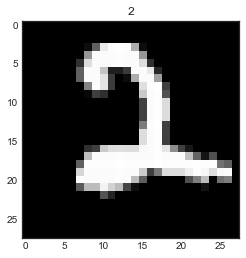

In [176]:
plt.title(label)
plt.imshow(image, 'gray')
plt.show()

In [177]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

### nn.Conv2d

- `in_channels`: channel의 갯수

- `out_channels`: 출력 채널의 갯수

- `kernel_size`: 커널(필터) 사이즈

- 텐서플로우, 케라스와 다르게 레이어의 `input`인자에도 값을 집어 넣어줘야함

In [178]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [179]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [180]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

In [181]:
weight = weight.detach()

In [182]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

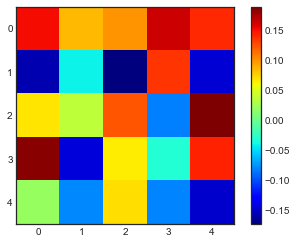

In [183]:
plt.imshow(weight[0, 0, :, :], 'jet')
plt.colorbar()
plt.show()

In [185]:
print(images.shape)
# torch.Size([8, 1, 28, 28]) : 1번만 출력했기 때문에 batch_size 만큼만 가져왔다.

torch.Size([8, 1, 28, 28])


In [186]:
input_image = torch.unsqueeze(images[0], dim = 0)

In [187]:
output_data = layer(input_image)

In [188]:
output = output_data.data

In [189]:
output_arr = output.numpy()
output_arr.shape

(1, 20, 24, 24)

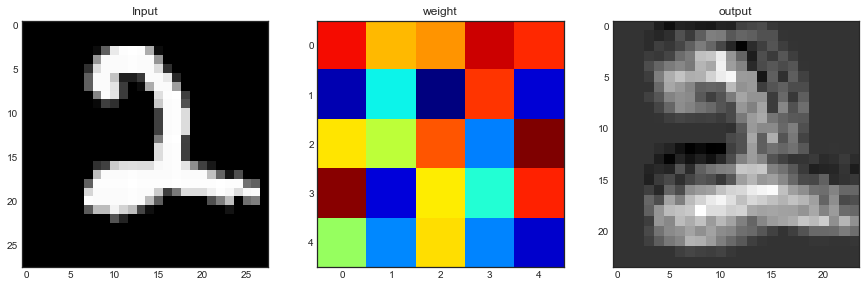

In [190]:
plt.figure(figsize = (15,30))
plt.subplot(131)
plt.title('Input')
plt.imshow(image, 'gray')
plt.subplot(132)
plt.title('weight')
plt.imshow(weight[0, 0,:,:], 'jet')
plt.subplot(133)
plt.title('output')
plt.imshow(output_arr[0, 0, :, :], 'gray')
plt.show()

### Pooling
- `F.max_pool2d` 
  - `stride`

  - `kernel_size`

- `torch.nn.MaxPool2d` 도 많이 사용

In [191]:
image.shape

(28, 28)

In [193]:
pool = F.max_pool2d(output,2,2)
pool.shape

torch.Size([1, 20, 12, 12])

In [195]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

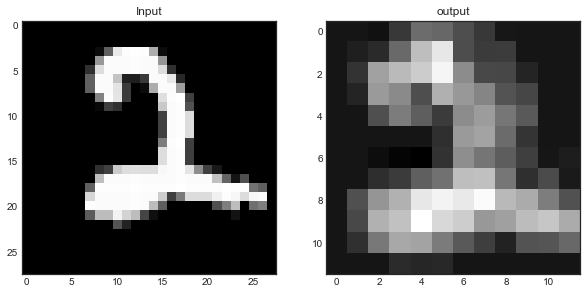

In [196]:
plt.figure(figsize = (10,15))
plt.subplot(121)
plt.title('Input')
plt.imshow(image, 'gray')
plt.subplot(122)
plt.title('output')
plt.imshow(pool_arr[0, 0, :, :], 'gray')
plt.show()

In [197]:
# Linear : 1d만 가능 .view()로 펼쳐줘야 함
image = torch.from_numpy(image)
image.shape

torch.Size([28, 28])

In [198]:
flatten = image.view(1, 28*28)
flatten.shape

# torch.Size([1, 784]) : 펼쳤다

torch.Size([1, 784])

In [199]:
lin = nn.Linear(784,10)(flatten)
lin.shape

torch.Size([1, 10])

In [200]:
lin

tensor([[ 0.8478,  0.3698, -0.1703,  0.3675,  0.5197, -0.5094,  0.3546, -1.0300,
          0.0075, -0.7734]], grad_fn=<AddmmBackward0>)

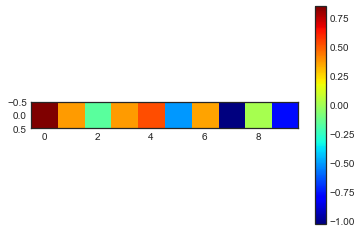

In [201]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

In [202]:
# softmax 
with torch.no_grad():
    flatten = image.view(1, 28*28)
    lin = nn.Linear(784, 10)(flatten)
    softmax = F.softmax(lin, dim = 1)

In [203]:
softmax

tensor([[0.1220, 0.1148, 0.1430, 0.1430, 0.1080, 0.1005, 0.0810, 0.0976, 0.0406,
         0.0494]])

In [204]:
np.sum(softmax.numpy())

1.0

In [205]:
inputs = torch.randn(4,3,28,28).to(device)
input.shape

torch.Size([20, 16, 50, 100])

In [206]:
layer = nn.Conv2d(3,20,5,1).to(device)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])